In [ ]:
eimport torch

In [ ]:
a = torch.tensor([
    [1., 2., 3.],
    [4., 5., 6.]
], dtype=torch.float16)
a

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float16)

In [ ]:
type(a)

torch.Tensor

In [ ]:
a.dtype

torch.float16

In [ ]:
a = torch.randn(3, 4)
a

tensor([[-0.3398, -0.0950,  1.6260, -1.8649],
        [ 0.6572,  0.7548,  0.4294, -0.6261],
        [ 1.1535, -0.6050, -0.9054, -0.1503]])

In [ ]:
a.shape

torch.Size([3, 4])

In [ ]:
b = torch.rand(3, 4)
b

tensor([[0.5950, 0.6613, 0.2369, 0.4959],
        [0.3892, 0.2089, 0.8794, 0.0487],
        [0.3155, 0.2532, 0.2157, 0.4078]])

In [ ]:
a + b

tensor([[ 0.2552,  0.5663,  1.8629, -1.3690],
        [ 1.0464,  0.9637,  1.3088, -0.5775],
        [ 1.4690, -0.3518, -0.6897,  0.2575]])

In [ ]:
a * b

tensor([[-0.2022, -0.0628,  0.3852, -0.9248],
        [ 0.2558,  0.1577,  0.3776, -0.0305],
        [ 0.3639, -0.1532, -0.1953, -0.0613]])

In [ ]:
torch.sin(a) / torch.exp(b)

tensor([[-0.1838, -0.0490,  0.7879, -0.5829],
        [ 0.4139,  0.5560,  0.1728, -0.5582],
        [ 0.6668, -0.4416, -0.6341, -0.0996]])

In [ ]:
a = torch.randn(5, 2)
b = torch.randn(2, 4)

In [ ]:
(a @ b).shape

torch.Size([5, 4])

In [ ]:
a = torch.randn(5, requires_grad=True)
a

tensor([-0.2471,  1.4925, -1.1152, -0.0602,  0.1761], requires_grad=True)

In [ ]:
l = (a ** 2).sum()
l

tensor(3.5670, grad_fn=<SumBackward0>)

In [ ]:
l.shape

torch.Size([])

In [ ]:
l.backward()

In [ ]:
a.grad

tensor([-0.9883,  5.9702, -4.4607, -0.2406,  0.7046])

In [ ]:
a = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, 3, requires_grad=False)
c = torch.randn(2, 3, requires_grad=True)

In [ ]:
loss = (torch.cos(a / 3) + torch.sqrt(torch.abs(b * c))).sum(dim=0).prod(dim=0)
loss

tensor(39.2590, grad_fn=<ProdBackward1>)

In [ ]:
loss.backward()

In [ ]:
a.grad

tensor([[-0.4042,  0.4052,  0.2151],
        [ 1.6134,  0.9258, -2.6517]])

In [ ]:
c.grad

tensor([[  -3.0521, -102.4510,   -6.2473],
        [   6.4475,    3.5821,   -9.8835]])

In [ ]:
b.grad

In [ ]:
device = torch.device('cpu')
#device = torch.device('mps')
#device

device(type='mps')

In [ ]:
A = torch.randn(10000, 10000)
B = torch.randn(10000, 10000)

In [ ]:
%%time
A @ B

CPU times: user 1min 5s, sys: 1.57 s, total: 1min 6s
Wall time: 9.92 s


tensor([[  85.9103,  142.2850, -181.9633,  ...,   39.8290,   50.2794,
          -18.4557],
        [  -1.2432,  -16.7778,   29.4107,  ...,  121.7980,  141.7350,
          -91.9905],
        [ 132.5496, -125.1536, -133.9395,  ...,  -88.2162, -162.9181,
          -40.5410],
        ...,
        [ -79.1834,  164.0332,   83.1497,  ...,  -46.4447,  -17.2977,
          -73.7036],
        [ -31.9492, -152.0621,  123.9805,  ...,    3.6658,   30.3147,
          -34.0739],
        [  71.8517,   -0.7742,  -68.8635,  ...,   18.9705,   76.1999,
          139.4532]])

In [ ]:
A = A.to(device)
B = B.to(device)

In [ ]:
%%time
A @ B

CPU times: user 20.5 ms, sys: 62.5 ms, total: 83 ms
Wall time: 263 ms


/Users/isadrtdinov/opt/anaconda3/envs/based/lib/python3.10/site-packages/torch/_tensor_str.py:115: UserWarning: The operator 'aten::nonzero' is not currently supported on the MPS backend and will fall back to run on the CPU. This may have performance implications. (Triggered internally at /Users/runner/work/_temp/anaconda/conda-bld/pytorch_1666646991213/work/aten/src/ATen/mps/MPSFallback.mm:11.)
  nonzero_finite_vals = torch.masked_select(


tensor([[  85.9103,  142.2846, -181.9630,  ...,   39.8290,   50.2792,
          -18.4556],
        [  -1.2431,  -16.7779,   29.4107,  ...,  121.7981,  141.7347,
          -91.9905],
        [ 132.5495, -125.1537, -133.9396,  ...,  -88.2162, -162.9179,
          -40.5413],
        ...,
        [ -79.1836,  164.0331,   83.1499,  ...,  -46.4445,  -17.2978,
          -73.7037],
        [ -31.9492, -152.0623,  123.9802,  ...,    3.6658,   30.3147,
          -34.0738],
        [  71.8518,   -0.7743,  -68.8636,  ...,   18.9705,   76.2001,
          139.4531]], device='mps:0')

In [ ]:
!ls /Users/isadrtdinov/datasets/

cifar10 mnist


In [ ]:
from torchvision.datasets import MNIST

In [ ]:
train_set = MNIST(root='~/datasets/mnist', train=True, download=True)
test_set = MNIST(root='~/datasets/mnist', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 133632396.65it/s]


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28671170.14it/s]


Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 71303730.17it/s]

Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 20353129.03it/s]


Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw



In [ ]:
len(train_set)

60000

In [ ]:
out = train_set[12675]

In [ ]:
out

(<PIL.Image.Image image mode=L size=28x28>, 4)

In [ ]:
train_set.data.shape

torch.Size([60000, 28, 28])

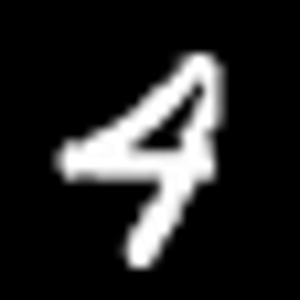

In [ ]:
out[0].resize((300, 300))

In [ ]:
torch.from_numpy?

In [ ]:
import torchvision.transforms as T
from torch.utils.data import DataLoader

In [ ]:
transform = T.Compose([
    T.ToTensor(),
    T.Resize(28),
])

In [ ]:
train_set = MNIST(root='~/datasets/mnist', transform=transform, train=True, download=True)
test_set = MNIST(root='~/datasets/mnist', transform=transform, train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 139646083.41it/s]


Extracting /root/datasets/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /root/datasets/mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 40745272.06it/s]


Extracting /root/datasets/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /root/datasets/mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 32935168.69it/s]

Extracting /root/datasets/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/datasets/mnist/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 18195347.44it/s]


Extracting /root/datasets/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/datasets/mnist/MNIST/raw



In [ ]:
out = train_set[12675]

In [ ]:
out

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [ ]:
out[0].shape

torch.Size([1, 28, 28])

In [ ]:
to_image = T.ToPILImage()
to_image(out[0])

In [ ]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

/usr/local/lib/python3.9/dist-packages/torch/utils/data/dataloader.py:561: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


In [ ]:
for batch in train_loader:
    break

In [ ]:
batch[0].shape

torch.Size([64, 1, 28, 28])

In [ ]:
from torch import nn

class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=28 * 28, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=10)
        )

    def forward(self, x):
        return self.model(x)

In [ ]:
model = MLP()

In [ ]:
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [ ]:
x = torch.randn(64, 28 * 28)

In [ ]:
y = model(x)

In [ ]:
y.shape

torch.Size([64, 10])

In [ ]:
for name, param in model.named_parameters():
    print(name, param.shape)

model.0.weight torch.Size([64, 784])
model.0.bias torch.Size([64])
model.2.weight torch.Size([64, 64])
model.2.bias torch.Size([64])
model.4.weight torch.Size([10, 64])
model.4.bias torch.Size([10])


In [ ]:
a = torch.randn(4, requires_grad=True)
l = a.sum()
l.backward()
a.grad

tensor([1., 1., 1., 1.])

In [ ]:
a = torch.randn(4, requires_grad=True)

with torch.no_grad():
    l = a.sum()
    l.backward()

a.grad

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm.notebook import tqdm


sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 15})


def plot_losses(train_losses, test_losses, train_accuracies, test_accuracies):
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs[0].set_ylabel('loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')
    axs[1].set_ylabel('accuracy')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    plt.show()

In [ ]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [ ]:
num_epochs = 20
model = MLP().to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1, momentum=0.9)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
criterion = nn.CrossEntropyLoss().to(device)

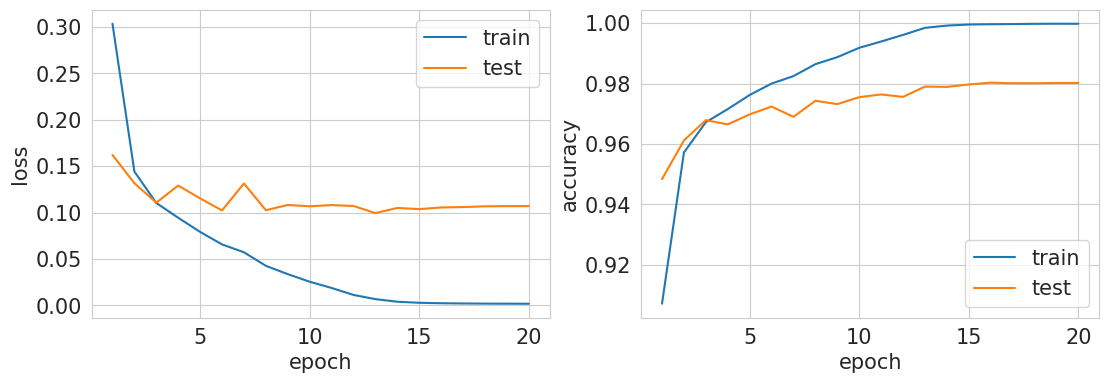

In [ ]:
train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss, running_acc = 0.0, 0.0

    for images, labels in tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}'):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()
        logits = model(torch.flatten(images, start_dim=1))
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()

        accuracy = (logits.argmax(dim=1) == labels).detach().cpu().sum().item()
        running_loss += loss.item() * images.shape[0]
        running_acc += accuracy

    scheduler.step()
    train_losses.append(running_loss / len(train_loader.dataset))
    train_accuracies.append(running_acc / len(train_loader.dataset))

    model.eval()
    running_loss, running_acc = 0.0, 0.0
    with torch.inference_mode():
        for images, labels in tqdm(test_loader, desc=f'Testing {epoch}/{num_epochs}'):
            images = images.to(device)
            labels = labels.to(device)

            logits = model(torch.flatten(images, start_dim=1))
            loss = criterion(logits, labels)

            accuracy = (logits.argmax(dim=1) == labels).detach().cpu().sum().item()
            running_loss += loss.item() * images.shape[0]
            running_acc += accuracy

    test_losses.append(running_loss / len(test_loader.dataset))
    test_accuracies.append(running_acc / len(test_loader.dataset))

    plot_losses(train_losses, test_losses, train_accuracies, test_accuracies)

In [ ]:
torch.save({
    'model_state': model.state_dict(),
    'optimizer_state': optimizer.state_dict(),
    'scheduler_state': scheduler.state_dict()
}, 'checkpoint.pt')

In [ ]:
ckpt = torch.load('checkpoint.pt')

In [ ]:
model = MLP()
model.load_state_dict(ckpt['model_state'])
optimizer.load_state_dict(ckpt['optimizer_state'])
scheduler.load_state_dict(ckpt['scheduler_state'])

In [ ]:
ckpt['model_state']['model.0.weights'] = ckpt['model_state']['model.0.weight']
del ckpt['model_state']['model.0.weight']

In [ ]:
model = MLP()
model.load_state_dict(ckpt['model_state'])

RuntimeError: Error(s) in loading state_dict for MLP:
	Missing key(s) in state_dict: "model.0.weight". 
	Unexpected key(s) in state_dict: "model.0.weights". 